In [1]:
import json

with open('output/executions/36/simulations/cortex_1/1/bin_rates_B.json', 'r') as j:
     contents = json.loads(j.read())

In [3]:
times = list(map(int, list(contents.keys())))
values = list(contents.values())
values = [x for _, x in sorted(zip(times, values))]
times = sorted(times)

window_size = 10
i = window_size//2
ma = []

values = values+values+values+values
values = [0 for x in range(window_size//2)] + values + [0 for x in range(window_size//2)]

while i < (len(values) - window_size//2):
    
    window = values[(i - window_size//2) : (i + window_size//2)]
    window_average = round(sum(window) / window_size, 2)
    
    ma.append(window_average)
    
    i += 1

print(len(values))
print(len(ma))
  

2262
2252


9008
2252


ValueError: x and y must have same first dimension, but have shapes (9008,) and (2252,)

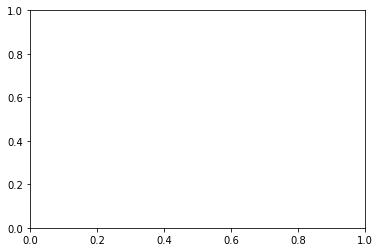

In [5]:
import matplotlib.pyplot as plt
times = times+[t+3000 for t in times]+[t+6000 for t in times]+[t+9000 for t in times]
print(len(times))
print(len(ma))
plt.plot(times, ma)

In [17]:
def divide_into_trials(seq, size):
    return [seq[int(pos):(int(pos) + int(size))] for pos in range(0, len(seq), int(size))]

In [27]:
values = [2,3,4,5,6,7,1,1,1,1,3,4,5,6]
threshold = 4
trial_time = 10
bin_size = 2
elements_for_trial = trial_time/bin_size
values_into_trials = divide_into_trials(values, elements_for_trial)
response_times = []
print(values_into_trials)
for values_index, trial_values in enumerate(values_into_trials):
    time_ids = [time_id for time_id, value in enumerate(trial_values) if value >= threshold]
    if len(time_ids):
        first_time_id = time_ids[0]
        print(first_time_id)
        actual_time = (values_index*trial_time)+(first_time_id*bin_size)
        response_times.append(actual_time)
print(response_times)

[[2, 3, 4, 5, 6], [7, 1, 1, 1, 1], [3, 4, 5, 6]]
2
0
1
[4, 10, 22]


In [1]:
from src.nest.plots.generate import moving_average_plot
from src.nest.output.rates import calculate_response_times
import json

# 68 is AUDITORY for 100 times
with open('output/executions/88/simulations/cortex_1/1/bin_rates_A_complete.json', 'r') as j:
    bin_rates_A_complete = json.loads(j.read())
with open('output/executions/88/simulations/cortex_1/1/bin_rates_B_complete.json', 'r') as j:
    bin_rates_B_complete = json.loads(j.read())

ma_rates_A = moving_average_plot(bin_rates_A_complete, 'plots/', 'ma_rates_A')
ma_rates_B = moving_average_plot(bin_rates_B_complete, 'plots/', 'ma_rates_B')

trial_time = 3000
bin_size = 5

th = 15
response_times = []
response_times_A = calculate_response_times(ma_rates_A, th, trial_time, bin_size)
for rt in response_times_A:
    response_times.append(rt%1000)

response_times_B = calculate_response_times(ma_rates_B, th, trial_time, bin_size)
for rt in response_times_B:
    response_times.append(rt%1000)

print(response_times)

[INFO] [2022.7.4 6:53:9 /home/ubuntu/workspace/nest-simulator-2.18.0/nestkernel/rng_manager.cpp:217 @ Network::create_rngs_] : Creating default RNGs
[INFO] [2022.7.4 6:53:9 /home/ubuntu/workspace/nest-simulator-2.18.0/nestkernel/rng_manager.cpp:260 @ Network::create_grng_] : Creating new default global RNG

              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: nest-2.18.0
 Built: Aug  6 2021 13:26:04

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.

[305, 370, 470, 230, 245, 225]


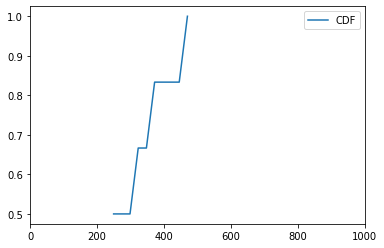

In [3]:
# CDF plot for spike times
import numpy as np
import matplotlib.pyplot as plt

# import json

# with open('output/executions/66/simulations/cortex_1/1/response_times.json', 'r') as j:
#     contents = json.loads(j.read())
#     response_times = contents['response_times']

data = response_times
  
# getting data of the histogram
count, bins_count = np.histogram(data, bins=10)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.xlim(0, 1000)
# plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()